# 本周内容的概括：
 - 搜索
 - 各种树形的搜索

# 1. 什么是搜索

寻找一组动作的组合，这个组合可以帮你达到你的目标

本质上是一个对特定顺序的搜寻的问题

思想： 把大问题拆解成小问题

> 搜索算法需要一个结构来保存已建构的部分搜索树
>
>  - 把选择肢写出来，列成一个树，结点是各个状态，连线就代表一个操作，连线上会标明行为的cost
>  - 有趣的是，导致失败的行为的cost为$\infty$

> 所需的原材料：
>  - 起始状态
>  - 可能的行动
>  - 行动的代价
>  - 行为的后继节点
>  - 目标状态

> 性能参数：
>  - 完备性（Completeness）：只要有解，算法就一定能找到吗？
>  - 最优性（Optimality）：算法一定能找到最优解吗？
>  - 时间复杂度（Time Complexity）：寻找解要花费多长时间？
>  - 空间复杂度的（Space Complexity）：运行算法要消耗多大的存储空间？
>
> 衡量复杂度的指标：
>  - `b`：分支指标：任意节点的最大后继节点数量
>  - `d`：最浅的终点节点的深度
>  - `D`：状态空间中最深的路径的深度

# 2. 搜索树算法（们）


## 2.1 Backtracking Search

> 算法流程：
> BackTracking(`s`,`path`)
> 1. 如果`s`是终点，更新最小代价路径
> 2. 对任何当前状态下可用的行动：
>       1. 用这个行动的代价和其后继节点扩展路径：运行BackTracking(`后继`，`path`)

>
> 返回：最小代价路径

> 性能参数：
> 
> 如果一个状态有`b`个行动，最大深度是`D`：
>  - 空间复杂度：O(D) 小
>  - 时间复杂度：O($b^D$) 大 

# 2.2 深度优先搜索

为了优化上述的backtracking搜索，我们做出如下改进：

> 改进：
>  - 核心思想：backtracking搜索，在第一次找到终点的时候停止
>  - 假设：行动没有代价，也就是说只要找到一个通的就算是解，不用考虑路径上的花费

> 性能参数：
> 
> 如果一个状态有`b`个行动，最大深度是`D`：
>  - 空间复杂度：O(D) 小
>  - 时间复杂度：O($b^D$) 大，**但这只是在最差条件下才会是这个。**  

 图示：深度优先和广度优先的顺序

 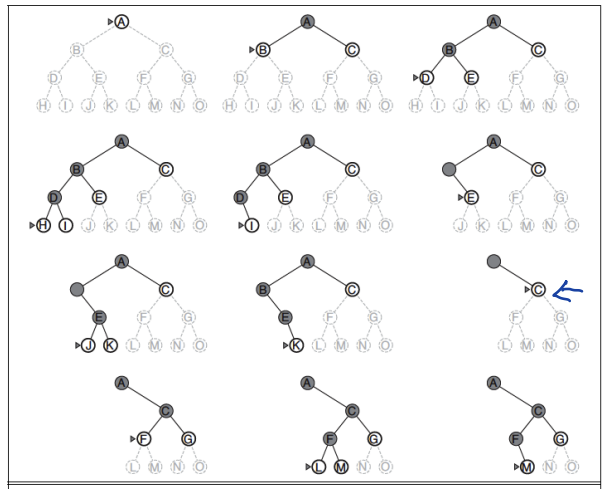

## 2.3 广度优先搜索

> 改进：
>  - 核心思想：逐深度探索所有节点
>  - 假设：动作的代价 $\geq$ 0

> 性能参数：
> 
> 如果一个状态有`b`个行动，最浅的解的深度是`d`：
>  - 空间复杂度：O(b^d) 还不如原来
>  - 时间复杂度：O($b^d$) **取决于$d$，即最浅的终点在哪里，而不是状态空间中最大可能深度$D$**   

图示：广度优先搜索的顺序

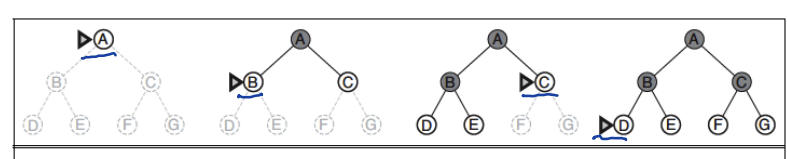

## 2.4 逐步增加深度的深度优先算法

> 改进：
>  - 核心思想：让深度优先在某一深度停止，逐步增加这个深度阈值
>  - 假设：动作的代价 $\geq$ 0

> 性能参数：
> 
> 如果一个状态有`b`个行动，最浅的解的深度是`d`：
>  - 空间复杂度：O(d) 强多了
>  - 时间复杂度：O($b^d$) **比深度优先强**  

图示：有深度限制的深度优先算法：

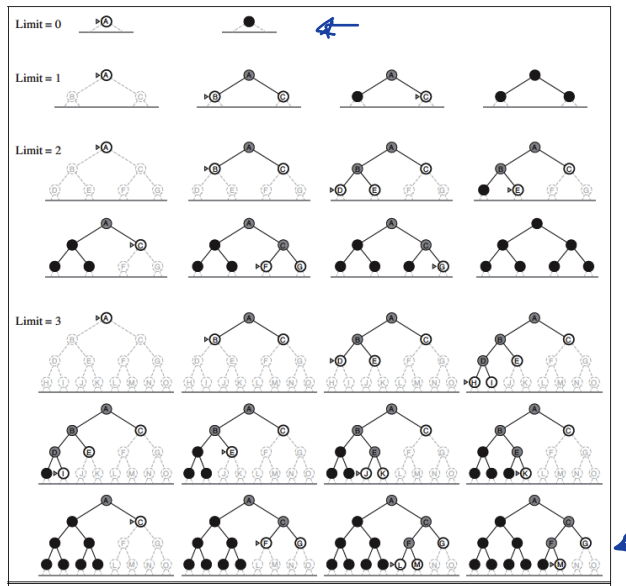

性能参数横向对比：
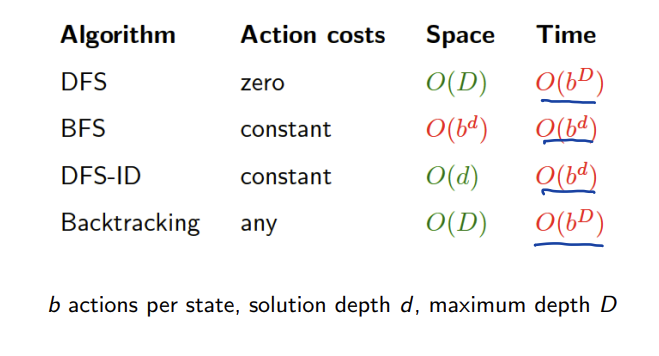


# 3. Uniform cost research

> 广度优先算法在行为代价相等的时候总能找到最优路径，因为最浅的代价一定就最少
>
> 但是，如果行为的代价不相等，广度优先就不好使了

> UCS：
>  - 核心思想：
>    - 优先扩展成本最低的节点。每个节点的成本都是到达这个节点的路径上的代价的和
>    - UCS会记录节点的抵达成本高低（显然需要）

> 
>  - 基础假设：**代价非负**

>  - 和广度优先的区别：
>    - 只有一个节点要被扩展的时候才检查此节点是否是终点
>    - 会频繁比较哪个节点代价最低

>  - 三类点的概念
>    - Explored：已找到通往此节点最优路径的节点
>    - Frontier：已经见到但是还没找到前往此节点最廉价路径的节点
>    - Unexplored：还没见过的节点

例子：

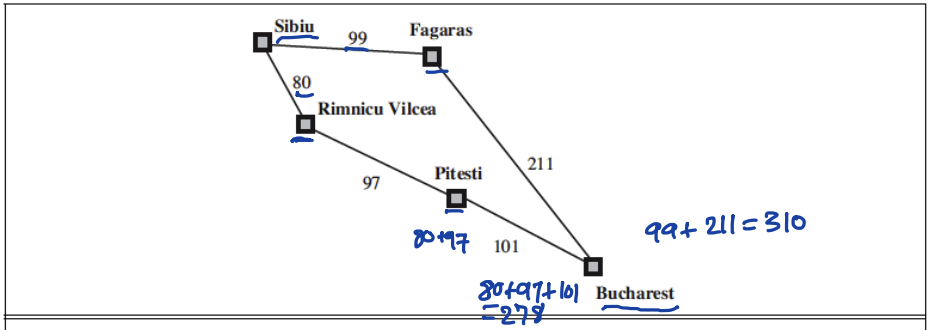

 - 先从Sibiu出发，扩展sibiu
 - R和F中，R更廉价，扩R
 - P和F中F廉价，扩F
 - P和B中P最低价，扩P
 - 扩B，发现是终点，结束

> **算法分析**：
>  - UCS是最优的
>  - UCS不在乎路径中会包含多少个节点，只关注总代价，因此可能导致无限循环。
>  - 保证完备，前提：代价为正
>  - 当代价都相等的时候，UCS和广度优先差不多。此时广度优先只要碰到终点就会结束，而UCS会分析与终点同深度的一切来确保最低代价

> 总结：
>  - 树搜索：内存消耗小，对于状态空间很大的情况很好使
>  - 状态：对过去线行动的总结，用来选取最优的未来行动
>  - 图搜索：UCS构建最优途径

# 4. Uninformed 搜索 vs Informed 搜索

- uninformed: 不知道终点的大概方向
  - 包含：深度优先，广度优先，深度受限的深度优先，UCS
- informed：也叫启发式搜索，知道终点大概在哪，会主动往那头凑合
  - 包含：hill climbing, best-first, **Greedy Search**, beam search, **A***,A

# 5. Informed Search:

 - 目标：提升UCS的速度
 - 问题：UCS始终以代价高低排序，决定下一个扩谁
 - 核心思想：把节点到终点的距离也算进代价里
 - 然后对新的代价应用UCS
  

# 6. 启发式搜索

> 启发函数定义：
>  - 一个启发函数会估计当前状态到终点之间的最低代价
>  - 它被内置了关于问题的一些其他知识
>  - 任意且非负
>  - 如果n为终点，那h(n) = 0

# 7. Greedy Best-first Search

实际上就是贪心算法。

此算法用h(n)来决定下一个扩谁

> 完备性：不完备（可能陷入循环）
> 最优吗：不最优

# 8. A*


A* 就是把启发代价和当前状态路径总代价相加的一种UCS。是UCS和贪心算法的结合

  **在特定条件（启发式函数可接受的情况）下**：
   - 完备？完备。
   - 最优？最优

**条件是什么？**

条件主要是关于启发代价函数的
> 1. 条件1：可接受性条件（admissible）
>  - h(n)的值永远小于等于真值，即永远不会高估成本
>
> 2. 一致性/单调性条件：
>  - $$父节点到终点的预计成本\leq子节点到终点的预计成本+父子之间的成本$$
>  - 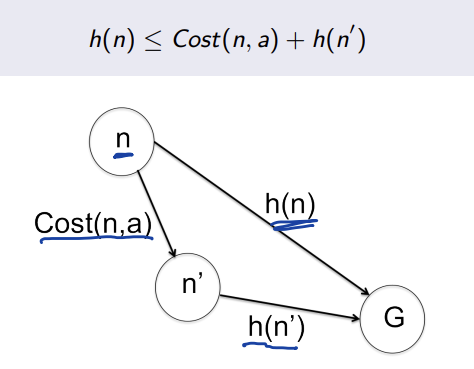
>  - 推论：具有一致性的方法一定也是可接受的
>       - 详细证明参考Week19PDF Search3.pdf P10/30

启发式函数的**主宰**：
 - 如果一个启发式函数在所有节点上的值都比另一个大，那就主宰了小的那个函数

怎么设计启发式函数？
 - 可以通过问题的Relaxation得到，即，相比原问题放松对行动的限制，也就是说，边上的代价值减少了
 - 放松问题的最优解的代价就是原问题的一个可接受的启发式函数
  

那除了放松以外，还有啥别的招数吗？
 - 把问题分成子问题，然后把子问题的代价加起来得到一个合适的启发函数
  
缺乏主宰启发式函数的时候怎么办？
 - 如果有多个启发式函数，都是可接受的但是谁也不能主宰谁，怎么办？
 - 缝合一个新的，用所有启发式函数的最大值进行一个缝的合

# 9. 作业
## 9.1 对于以下的搜索树：
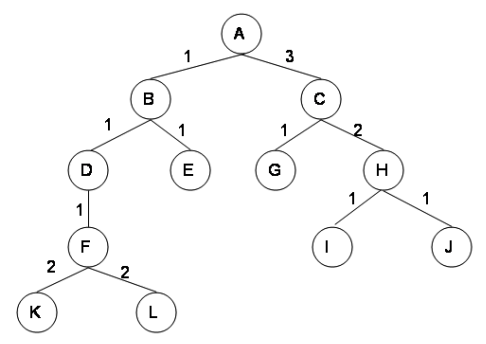  
目标是G  
如果两个节点分不出先后，则按字母表顺序分先后，给出遍历节点的顺序
 - 深度优先
 - 广度优先
 - UCS

解：  

深度优先：
 - A B D F K L E C G

广度优先：
 - A B C D E G

UCS：
 - **A**B(1) AC(3)
 - A**B**D(2) A**B**E(2) AC(3)
 - AB**D**F(3) ABE(2) AC(3)
 - AB**E**(2 证明了是死胡同) ABDF(3) AC(3)
 -  A**C**G(4) A**C**H(5) ABDF(3) ABE(2)
 -  ABD**F**K(5) ABD**F**L(5) ACG(4) ACH(5) 
 -  AC**G**() 完成
 - 结果：ABDECFG

## 9.2 对于倒水问题：你有一个水龙头，5升的桶一个，7升的桶一个，需要4升水
 - 当你在小桶里有S升水，大桶里有L升水的时候，能有啥可能的操作？
 - 从（0，0）的初始态开始，画出达到目标的树
 - 广度优先和深度优先哪个更适合？为啥？


解
1. 可能的操作有六种：
  - 清空大桶/小桶
  - 注满大桶/小桶
  - 一个桶往另一个桶里倒

2. 这个我觉得有点扯了，详见答案吧
  - Week19LabsheetSolution PDF

3. 广度优先更合适，因为这里行动代价是等同的，那还是广度优先直接找最优解合适。


## 9.3 以下是一张图。有Cost和启发数值

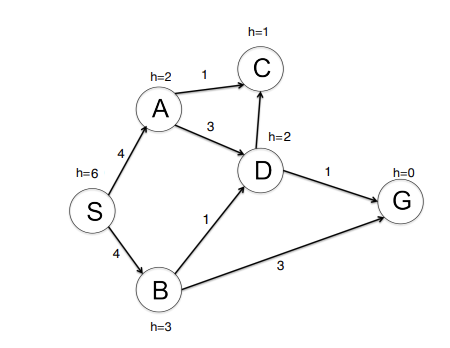

目标是从S到G

来整一个贪心算法。

解：
 - S A C(此时证明C是死路) D(从C回头，重新扩A) G
 - 通路：SADG

## 9.4 对于以下的图，代价和启发数值都给出了

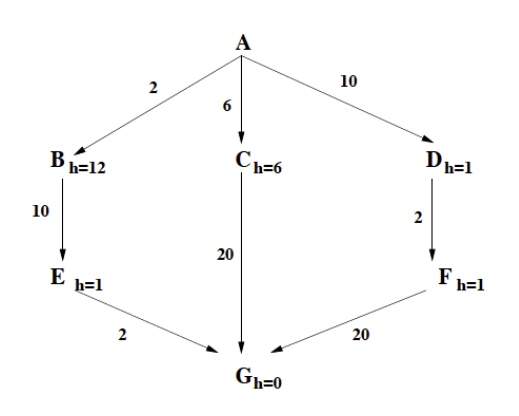

 - （a）给出A*的结果
 - （b）给出A*找到的路径
 - （c）这个启发函数可接受吗？连续吗？
 - （d）假如你要用$$f(n) = (1-w)g(n)+wh(n)$$
  
  来进行搜索。假设h是可接受的，那w为何值时算法会能找到最优解

解： 
（a）:
- 扩A
- B(14) C(12) D(11) 扩D
- B(14) C(12) F(13) 扩C
- G(26_途径C) B(14) F(13) 扩F
- G(32_途径DF) B(14) G(26_途径C) 扩B
- E(13) 加上上述两个G 扩E
- G(14_途径E)

ADCFBEG

（b）:  
 - 结果：ABEG  

（c）:
 - 可接受，因为没有高估成本的地方
 - 不连续，B的启发值就不对了

（d）:
 - 最后一问不用拿图重新试，只要理解就可以了：
 - 如果$w=0$，则实际上算法退化为UCS。UCS一定保证找到最优解
 - 如果$w=0.5$，则此时实际上就是A*，在h可接受的情况下，一定能找到最优解